In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
dataset=pd.read_csv("kidney_cleaned.csv",index_col=0)

In [3]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [4]:
numerical_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [5]:
for feature in numerical_features:
    dataset[feature] = pd.to_numeric(dataset[feature], errors='coerce')

In [6]:
dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [7]:
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [8]:
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature].astype(str))
    label_encoders[feature] = le


In [9]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,0,0,0,ckd


# After encoding lets start little feature engineering

In [10]:
dataset['age_bp_interaction'] = dataset['age'] * dataset['bp']


In [11]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(dataset[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)


In [12]:
poly_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,hemo^2,hemo pcv,hemo wc,hemo rc,pcv^2,pcv wc,pcv rc,wc^2,wc rc,rc^2
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.528754,4.627244,...,237.16,677.6,120120.0,80.080000,1936.0,343200.0,228.800000,60840000.0,40560.000000,27.040000
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,137.528754,4.627244,...,127.69,429.4,67800.0,53.194015,1444.0,228000.0,178.882528,36000000.0,28244.609665,22.159944
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,137.528754,4.627244,...,92.16,297.6,72000.0,45.191375,961.0,232500.0,145.930483,56250000.0,35305.762082,22.159944
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.000000,2.500000,...,125.44,358.4,75040.0,43.680000,1024.0,214400.0,124.800000,44890000.0,26130.000000,15.210000
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,137.528754,4.627244,...,134.56,406.0,84680.0,53.360000,1225.0,255500.0,161.000000,53290000.0,33580.000000,21.160000


In [13]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,age_bp_interaction
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,7800.0,5.200000,1,1,0,0,0,0,ckd,3840.0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,6000.0,4.707435,0,0,0,0,0,0,ckd,350.0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,7500.0,4.707435,0,1,0,1,0,1,ckd,4960.0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,6700.0,3.900000,1,0,0,1,1,1,ckd,3360.0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,7300.0,4.600000,0,0,0,0,0,0,ckd,4080.0


In [14]:
dataset['log_bgr'] = np.log1p(dataset['bgr'])
#LOG feature engineering

In [15]:
#binning
dataset['age_bin'] = pd.cut(dataset['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

In [16]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,classification,age_bp_interaction,log_bgr,age_bin
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,1,1,0,0,0,0,ckd,3840.0,4.804021,41-60
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,0,0,0,0,0,0,ckd,350.0,4.804021,0-20
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,0,1,0,1,0,1,ckd,4960.0,6.049733,61-80
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,1,0,0,1,1,1,ckd,3360.0,4.770685,41-60
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,0,0,0,0,0,0,ckd,4080.0,4.672829,41-60


In [17]:
# Combining new features with the dataset
dataset = pd.concat([dataset, poly_df], axis=1)

In [18]:
print("Dataset after feature engineering:")
print(dataset.head())

Dataset after feature engineering:
   id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  hemo^2  hemo pcv  \
0   0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  237.16     677.6   
1   1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  127.69     429.4   
2   2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   92.16     297.6   
3   3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  125.44     358.4   
4   4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  134.56     406.0   

    hemo wc    hemo rc   pcv^2    pcv wc      pcv rc        wc^2  \
0  120120.0  80.080000  1936.0  343200.0  228.800000  60840000.0   
1   67800.0  53.194015  1444.0  228000.0  178.882528  36000000.0   
2   72000.0  45.191375   961.0  232500.0  145.930483  56250000.0   
3   75040.0  43.680000  1024.0  214400.0  124.800000  44890000.0   
4   84680.0  53.360000  1225.0  255500.0  161.000000  53290000.0   

          wc rc       rc^2  
0  40560.000000  27.040000  
1  28244.609665  22.159

# Lets start PCA

In [19]:
# Preparing data for PCA
X = dataset.drop(['classification', 'age_bin'], axis=1)
y = dataset['classification']

In [20]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Apply PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]

X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

X_pca_df['class'] = y.values


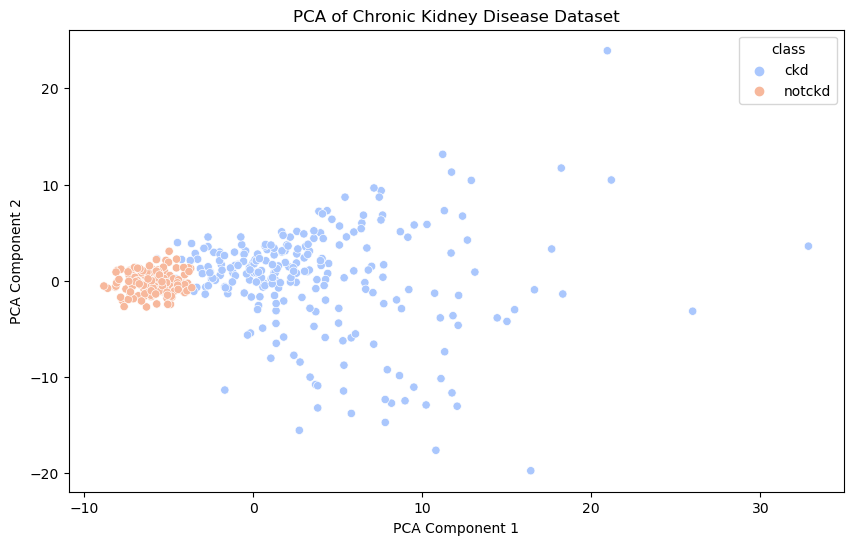

In [22]:
# Plot PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='class', data=X_pca_df, palette='coolwarm')
plt.title('PCA of Chronic Kidney Disease Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [23]:
finalcomponents=X_pca_df[["PCA_1","PCA_2"]]

In [24]:
finalcomponents.head()

,PCA_1,PCA_2
0,-3.329488,-0.682775
1,-1.100034,2.976661
2,9.507583,-11.049434
3,5.519114,4.558838
4,-0.214393,1.432625


In [26]:
finalcomponents.shape

(400, 2)

In [27]:
dff=pd.read_csv("kidney_cleaned.csv")

In [28]:
dff=pd.concat([dff,finalcomponents],axis=1)

In [29]:
dff.head()

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,rc,htn,dm,cad,appet,pe,ane,classification,PCA_1,PCA_2
0,0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,...,5.200000,yes,yes,no,good,no,no,ckd,-3.329488,-0.682775
1,1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,...,4.707435,no,no,no,good,no,no,ckd,-1.100034,2.976661
2,2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,...,4.707435,no,yes,no,poor,no,yes,ckd,9.507583,-11.049434
3,3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,...,3.900000,yes,no,no,poor,yes,yes,ckd,5.519114,4.558838
4,4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,...,4.600000,no,no,no,good,no,no,ckd,-0.214393,1.432625


In [30]:
X_pca_df

,PCA_1,PCA_2,class
0,-3.329488,-0.682775,ckd
1,-1.100034,2.976661,ckd
2,9.507583,-11.049434,ckd
3,5.519114,4.558838,ckd
4,-0.214393,1.432625,ckd
...,...,...,...
395,-5.064431,-1.498745,notckd
396,-8.825982,-0.541410,notckd
397,-7.395504,0.924689,notckd
398,-6.830694,1.307877,notckd


In [31]:
processed_dataset_path = "processed_dataset.csv"
dataset.to_csv(processed_dataset_path, index=False)

print(f"Processed dataset saved to {processed_dataset_path}")

Processed dataset saved to processed_dataset.csv


In [32]:
processed_dataset_path = "dataset_with_pca.csv"
dff.to_csv(processed_dataset_path, index=False)

print(f"pca dataset saved to {processed_dataset_path}")

pca dataset saved to dataset_with_pca.csv
